## Setup and data loading

In [62]:
import re
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker


startups_df=pd.read_csv("Startups.csv")
founders_df=pd.read_csv("Founders.csv")

In [63]:
startups_df.rename(columns={
  "Satus":"Status",
  "Amounts raised in different funding rounds":"Amount raised",
  "Headquarters (City)":"HQ City",
  "Headquarters (US State)":"HQ State",
  "Headquarters (Country)":"HQ Country",
},inplace=True)
startups_df['Year Founded'] = startups_df['Year Founded'].astype('Int64')
startups_df.head(1)

,Company,Status,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,Amount raised,Office Address,HQ City,HQ State,HQ Country,Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website
0,Curebit,Operating,2010,San Francisco - California - USA,Talkable is a social referral platform for onl...,"E-Commerce, Analytics, Internet, Marketing, So...","Allan Grant, Dominic Coryell, Jeff Yee, Nori Y...",2011,Winter,"500 Startups, Dharmesh Shah, Alex Lloyd, Auren...","$1200000, undisclosed amount","290 Division St, #405, San Francisco, Californ...",San Francisco,California,USA,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/curebit,https://www.talkable.com


In [64]:
startups_columns=list(startups_df.columns)
print("number of columns for startups: ",len(startups_columns))
print("available data: ",startups_columns)

number of columns for startups:  19
available data:  ['Company', 'Status', 'Year Founded', 'Mapping Location', 'Description', 'Categories', 'Founders', 'Y Combinator Year', 'Y Combinator Session', 'Investors', 'Amount raised', 'Office Address', 'HQ City', 'HQ State', 'HQ Country', 'Logo', 'Seed-DB / Mattermark Profile', 'Crunchbase / Angel List Profile', 'Website']


In [65]:
founders_df.head(3)

,Founder,Company,Gender
0,Aakash Patel,Flytenow,Male
1,Aarjav Trivedi,InstantCab,Male
2,Aaron Cheung,HomeJoy,Male


## Dataset information

This dataset contains information on almost 700 startup companies backed by Y Combinator between 2005 and 2014.

The data is collected and aggregated from SeedDB, CrunchBase and AngelList

The data included in the dataset is:

1. Startups.csv
  - Company - represents company name	
  - Status - status of the company currently - Operating, Exited, Dead, etc.
  - Year Founded
  - Mapping Location - city, state and country information
  - Description - short description of the company's business
  - Categories - areas the company is working in
  - Founders - list of founders of the company
  - Y Combinator Year - year in which funding from Y Combinator was received by the company
  - Y Combinator Session - summer or winter of this year
  - Investors - list of investors backing the company
  - Amounts raised in different funding rounds - list of amount of funding received over time
  - Office Address
  - Headquarters (City)
  - Headquarters (US State)
  - Headquarters (Country)
  - Logo
  - Seed-DB Profile
  - Crunchbase / Angel List Profile	Website
  - Website


2. Founders.csv
  - Founder
  - Company
  - Gender


## Data cleaning

Y combinator year and session are 2 columns that represent the same event

The winter session is at the start of the year, while the summer one is in the middle

We will combine these 2 columns


In [66]:
condition = startups_df['Y Combinator Session'] == 'Summer'
startups_df.loc[condition,"Y Combinator Year"]+=0.5
startups_df=startups_df.drop(columns="Y Combinator Session")

In [67]:
def amount(text):
    item = [word for word in str(text).split()]
    item = [re.sub(r'\D','',word) for word in item if word != '' and word != '']
    res = [int(ele) for ele in item if ele.strip()]
    return sum(res)
startups_df['Amount raised (USD)'] = startups_df['Amount raised'].apply(amount).astype(int)
startups_df['log amount raised'] = np.log10(startups_df['Amount raised (USD)'])

startups_df=startups_df.drop(columns="Amount raised")

/home/mihailo/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



We can see that the Mapping location information is already contained in the variouls headquarter fields

We also drop the office address, logo, company website and company profiles used to obtain this data


In [68]:
startups_df_basic=startups_df.drop(
  [
    'Mapping Location',
    'Office Address',
    'Logo',
    'Website',
    'Crunchbase / Angel List Profile','Seed-DB / Mattermark Profile'
  ]
  ,axis=1
)
startups_df_basic.head(3)

,Company,Status,Year Founded,Description,Categories,Founders,Y Combinator Year,Investors,HQ City,HQ State,HQ Country,Amount raised (USD),log amount raised
0,Curebit,Operating,2010,Talkable is a social referral platform for onl...,"E-Commerce, Analytics, Internet, Marketing, So...","Allan Grant, Dominic Coryell, Jeff Yee, Nori Y...",2011.0,"500 Startups, Dharmesh Shah, Alex Lloyd, Auren...",San Francisco,California,USA,1200000,6.079181
1,Goldbely,Operating,<NA>,Goldbely is an e-commerce site for buying and ...,"Social, E-Commerce","Joe Ariel, Joel Gillman, Trevor Stow, Vanessa ...",2013.0,"500 Startups, Funders Club, Dave McClure, Tim ...",San Francisco,California,USA,3000000,6.477121
2,theDailyMuse,Operating,2011,The Daily Muse is a job search platform offeri...,NaN,"Alex Cavoulacos, Kathryn Minshew, Melissa McCr...",2012.0,"500 Startups, Great Oaks Venture Capital, Grea...",New York City,New York,USA,7300000,6.863323


In [69]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company                          688 non-null    object 
 1   Status                           688 non-null    object 
 2   Year Founded                     151 non-null    Int64  
 3   Mapping Location                 488 non-null    object 
 4   Description                      605 non-null    object 
 5   Categories                       547 non-null    object 
 6   Founders                         449 non-null    object 
 7   Y Combinator Year                688 non-null    float64
 8   Investors                        688 non-null    object 
 9   Office Address                   444 non-null    object 
 10  HQ City                          480 non-null    object 
 11  HQ State                         451 non-null    object 
 12  HQ Country            

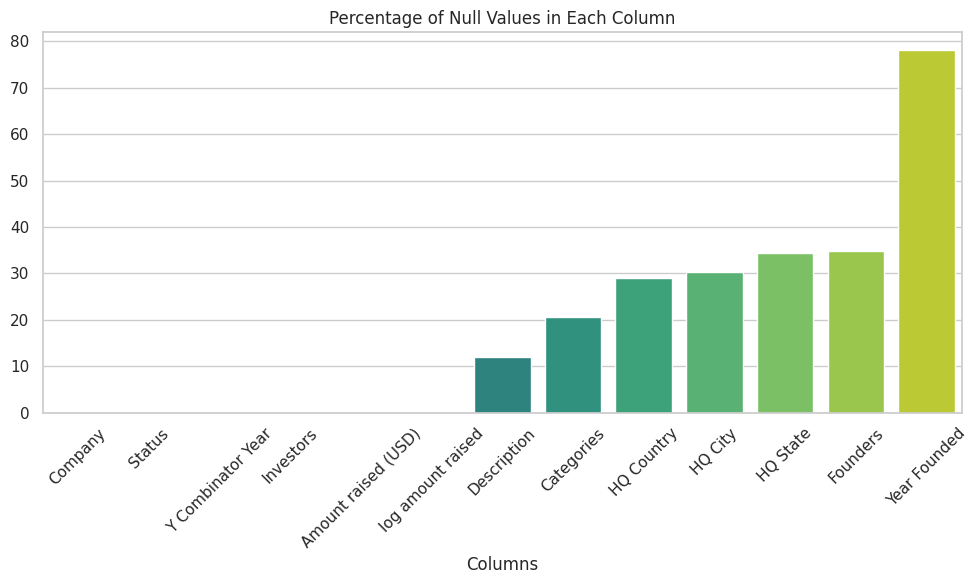

In [70]:
null_pcts = (startups_df_basic.isnull().sum().sort_values(ascending=True)/len(startups_df_basic))*100
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_pcts.index, y=null_pcts.values, palette='viridis')
plt.xlabel('Columns')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that our dataset has significant amounts of null values for information about year founded, location and founders

However, the dataset has low amounts of null values for information relating to company operations and investors/investing which is more relevant to us

We will take a look at time-series data - founding and y-combinator funding date, noting the low amonuts of data available

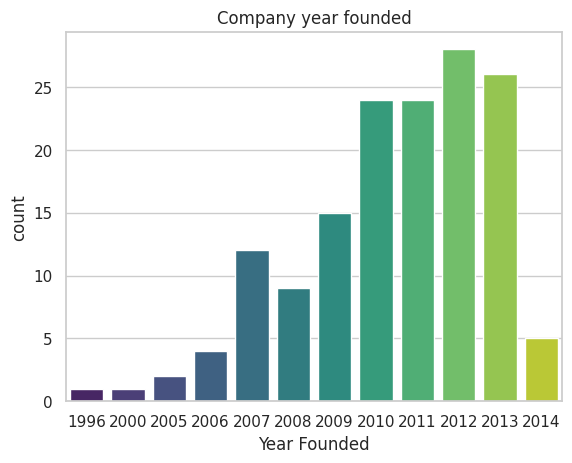

In [71]:
startups_with_founding_year=startups_df_basic.dropna(subset=['Year Founded'])
sns.countplot(data=startups_with_founding_year, x='Year Founded', palette='viridis')
plt.title("Company year founded")
plt.show()

There is a significant increase in the number of companies founded over time. This may be explained by an increase in the number of startups, but is more likely due to a correlation between founding year and year applying to Y-combinator, and the increase in popularity of Y-combinator over time

/tmp/ipykernel_272009/2412764555.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_272009/2412764555.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



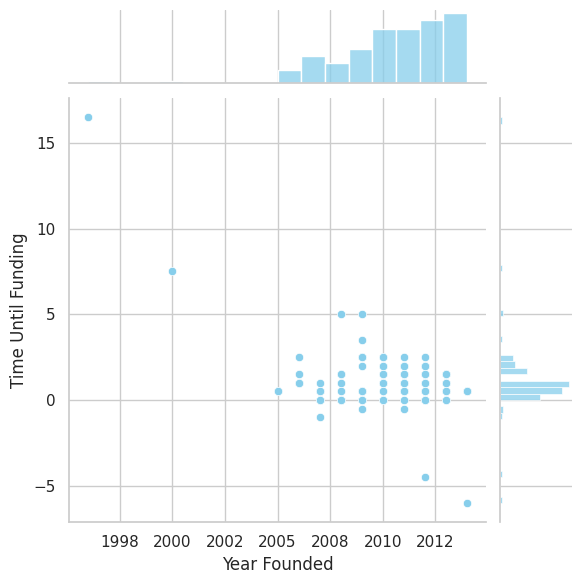

In [72]:
startups_with_founding_year['Year Founded'] = startups_with_founding_year['Year Founded'].astype(float)

#  Calculate the delay until Y Combinator Year
startups_with_founding_year['Time Until Funding'] = startups_with_founding_year['Y Combinator Year'] - startups_with_founding_year['Year Founded']

# Create a jointplot
sns.set(style="whitegrid")
joint = sns.jointplot(data=startups_with_founding_year, x='Year Founded', y='Time Until Funding', kind='scatter', color='skyblue')

# Customize the x-axis tick labels to display as integers
joint.ax_joint.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.show()

We can see that a vast majority of the startups receive funding within 1 year of being founded, some receive it within 2. This confirms our previous assumption that the increase in the number of startups is mostly caused by Y-combinator accepting more and more companies over time

There is no significant correlation between founding year and time to receive funding

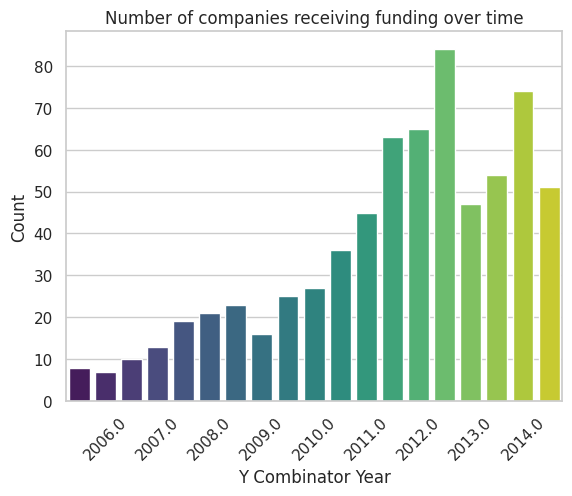

In [73]:
sns.set(style="whitegrid")
ax = sns.countplot(data=startups_df_basic, x='Y Combinator Year', palette='viridis')

# Show every 2nd value on the x-axis
every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth == 0:
        label.set_visible(False)

plt.title("Number of companies receiving funding over time")
plt.xlabel("Y Combinator Year")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

We again confirm on the larger dataset that the number of companies receiving YC funding is the main factor which was contributing to the number of companies being founded each year growing

Now, lets take a look at the geographic distribution of the startups

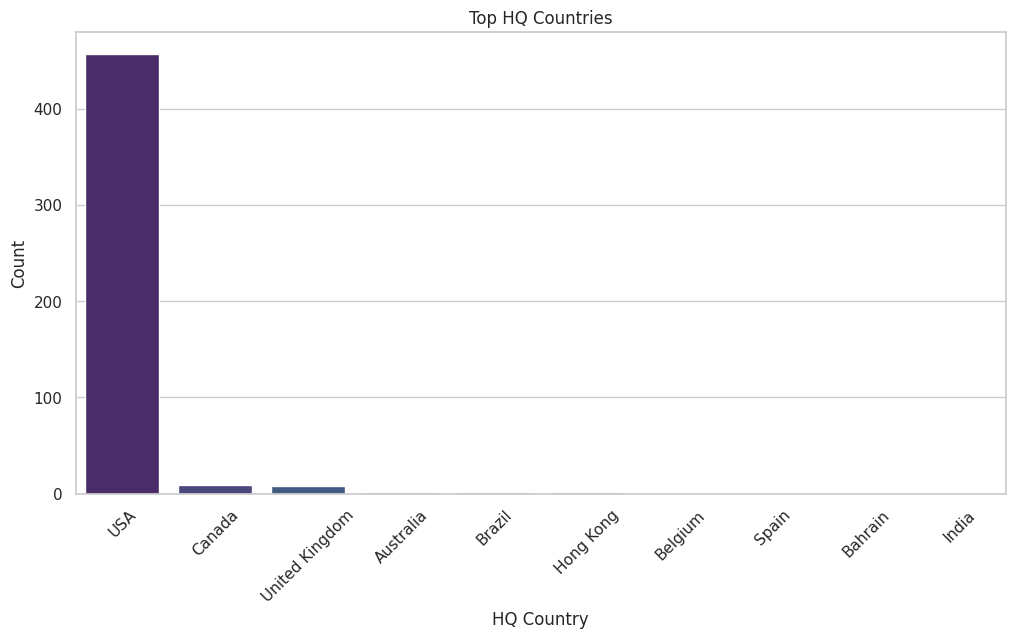

In [74]:
# Calculate value counts for "HQ Country" and select the top 10
top_countries = startups_df_basic['HQ Country'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ Country', order=top_countries.index, palette='viridis')

plt.title("Top HQ Countries")
plt.xlabel("HQ Country")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

The vast majority of the companies analyzed are in the USA (~95% of companies with known location data)

We can take a look at the distribution of non-USA based startups

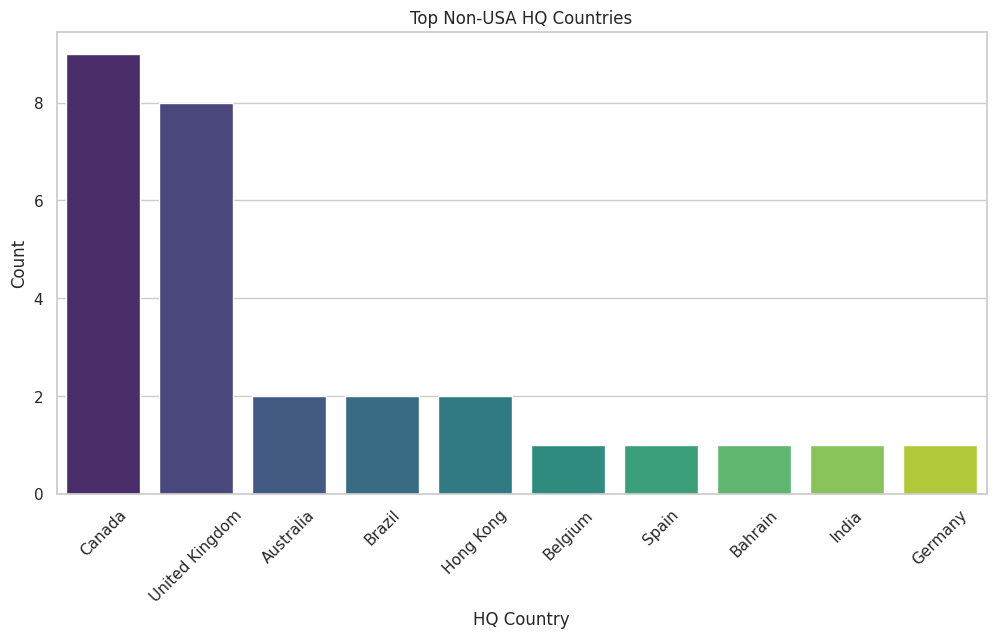

In [75]:
# Calculate value counts for "HQ Country" and select the top 10
top_countries = startups_df_basic.where(startups_df_basic['HQ Country']!="USA")['HQ Country'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ Country', order=top_countries.index, palette='viridis')

plt.title("Top Non-USA HQ Countries")
plt.xlabel("HQ Country")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

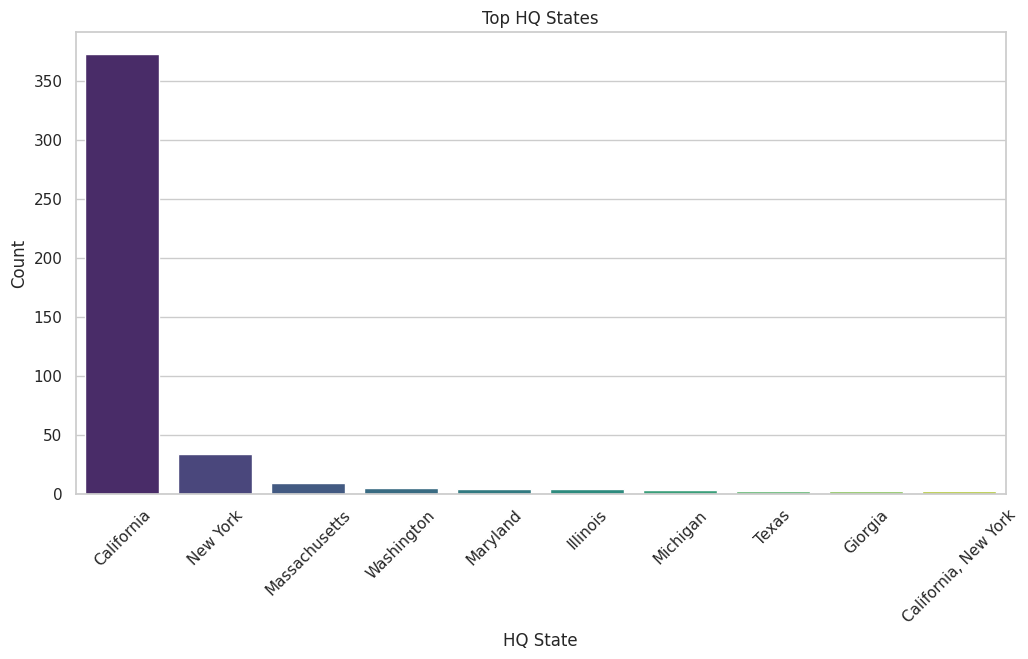

In [76]:
top_states = startups_df_basic['HQ State'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ State', order=top_states.index, palette='viridis')

plt.title("Top HQ States")
plt.xlabel("HQ State")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

About 90% of all companies with location data are in California

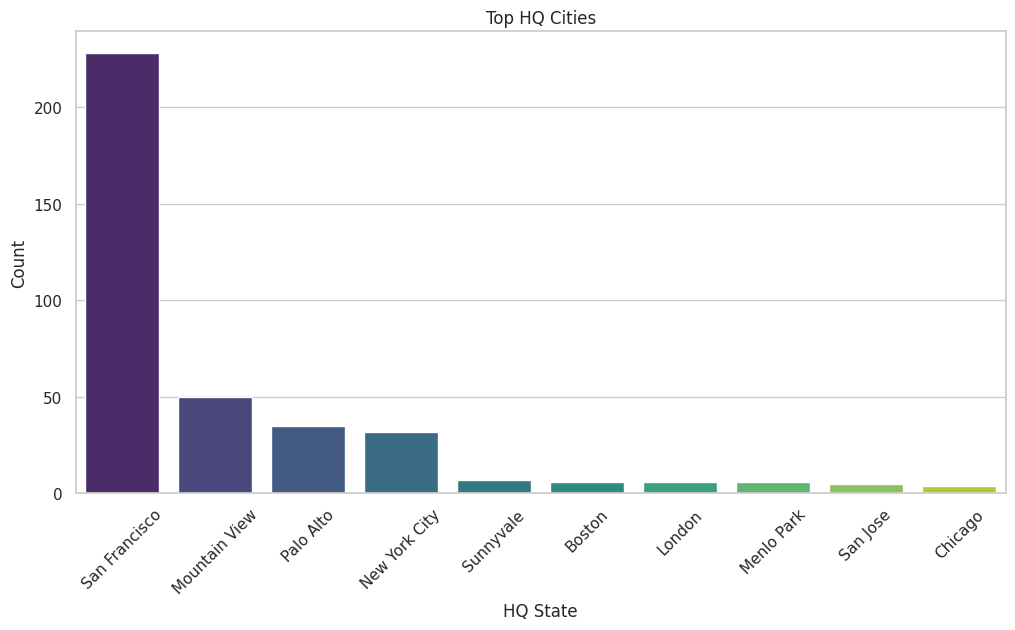

In [77]:
top_cities = startups_df_basic['HQ City'].value_counts().nlargest(10)

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(data=startups_df_basic, x='HQ City', order=top_cities.index, palette='viridis')

plt.title("Top HQ Cities")
plt.xlabel("HQ State")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

About half of the total companies are in San Francisco

Almost all the others are in Mountain View and Palo Alto (California) and New York City

We can now start looking at the amount of money raised by companies

In [78]:
startups_with_amount_raised=startups_df_basic[startups_df_basic["Amount raised (USD)"]>0.1]
print(len(startups_with_amount_raised))


317


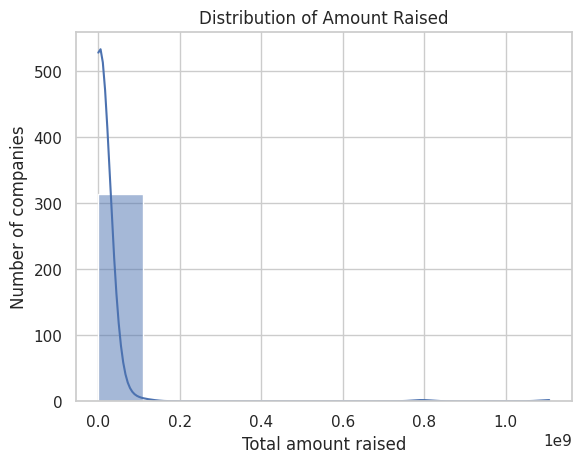

In [79]:
sns.histplot(data=startups_with_amount_raised, x='Amount raised (USD)', kde=True, bins=10)
plt.xlabel('Total amount raised')
plt.ylabel('Number of companies')
plt.title('Distribution of Amount Raised')
plt.show()


In [80]:
startups_with_amount_raised["Amount raised (USD)"].describe()

count    3.170000e+02
mean     1.224363e+07
std      7.710528e+07
min      1.000000e+04
25%      3.900000e+05
50%      1.500000e+06
75%      5.500000e+06
max      1.107215e+09
Name: Amount raised (USD), dtype: float64

We can see that the distribution of the amount raised varies drastically across scale - from 10k USD to over 1bil USD, so we will look at the log of this amount in the future

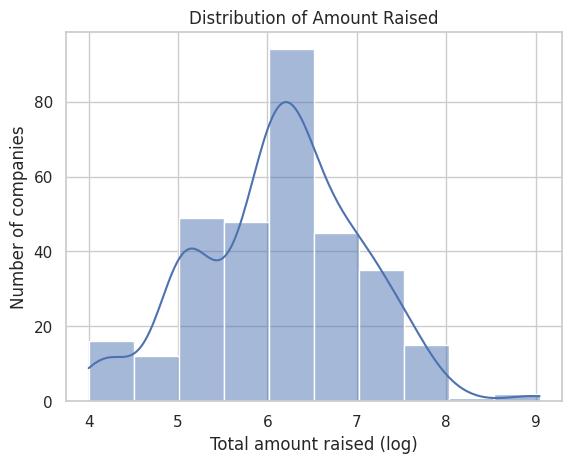

In [81]:
sns.histplot(data=startups_with_amount_raised, x='log amount raised', kde=True, bins=10)
plt.xlabel('Total amount raised (log)')
plt.ylabel('Number of companies')
plt.title('Distribution of Amount Raised')
plt.show()

We can see that the log of the amount raised is approximately normally distributed, with the mean being around 6,2 or 1.5 million USD

We can now analyze the amount raised based on geographic location

/tmp/ipykernel_272009/2516020781.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



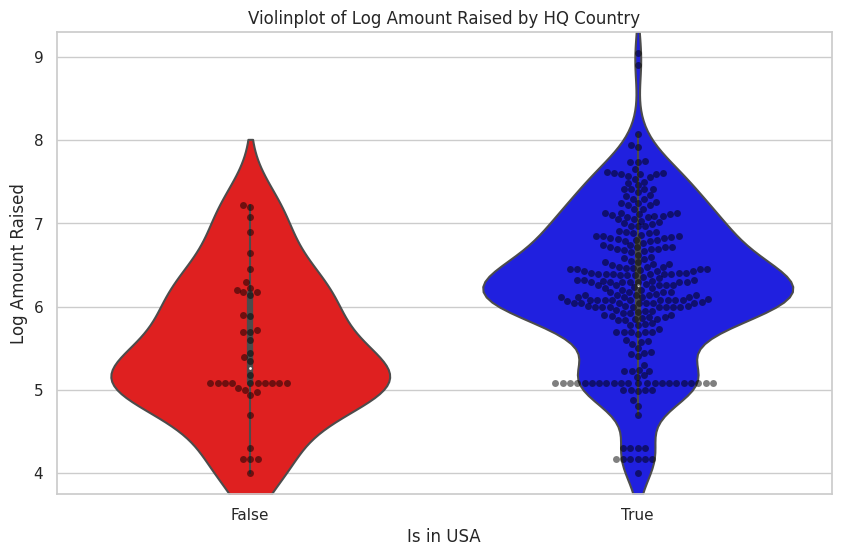

In [82]:
# # Filter the DataFrame into two classes: USA and Others
# startups_with_amount_raised["is USA"] = startups_with_amount_raised['HQ Country'] == 'USA'

# # Create a swarmplot for the "log amount raised" column
# plt.figure(figsize=(10, 6))
# sns.swarmplot(x='is USA', y='log amount raised', data=startups_with_amount_raised)

# # Add labels and legend
# plt.xlabel('Is in USA')
# plt.ylabel('Log Amount Raised')
# plt.legend()

# # Show the plot
# plt.title('Swarmplot of Log Amount Raised by HQ Country')
# plt.show()


# Filter the DataFrame into two classes: USA and Others
startups_with_amount_raised["is USA"] = startups_with_amount_raised['HQ Country'] == 'USA'

# Create a violinplot for the "log amount raised" column
plt.figure(figsize=(10, 6))
sns.violinplot(x='is USA', y='log amount raised', data=startups_with_amount_raised, palette=['red', 'blue'])
sns.swarmplot(x='is USA', y='log amount raised', data=startups_with_amount_raised, color='black', alpha=0.5)

# Add labels
plt.xlabel('Is in USA')
plt.ylabel('Log Amount Raised')

# Show the plot
plt.title('Violinplot of Log Amount Raised by HQ Country')
plt.show()

/tmp/ipykernel_272009/2536197345.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



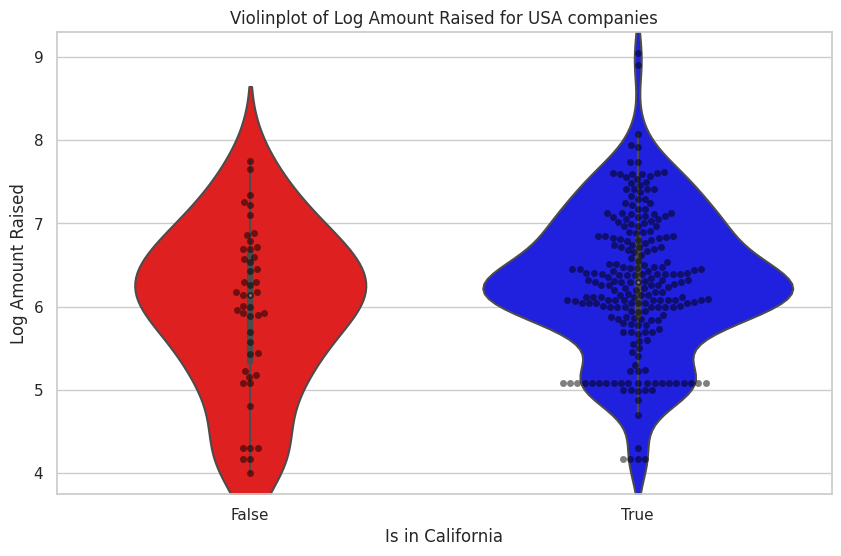

In [83]:
# # Filter the DataFrame into two classes: USA and Others
# startups_with_amount_raised["is USA"] = startups_with_amount_raised['HQ Country'] == 'USA'

# # Create a swarmplot for the "log amount raised" column
# plt.figure(figsize=(10, 6))
# sns.swarmplot(x='is USA', y='log amount raised', data=startups_with_amount_raised)

# # Add labels and legend
# plt.xlabel('Is in USA')
# plt.ylabel('Log Amount Raised')
# plt.legend()

# # Show the plot
# plt.title('Swarmplot of Log Amount Raised by HQ Country')
# plt.show()

usa_startups_with_amount_raised=startups_with_amount_raised[startups_with_amount_raised['HQ Country']=='USA']

# Filter the DataFrame into two classes: USA and Others
usa_startups_with_amount_raised["is California"] = usa_startups_with_amount_raised['HQ State'] == 'California'

# Create a violinplot for the "log amount raised" column
plt.figure(figsize=(10, 6))
sns.violinplot(x='is California', y='log amount raised', data=usa_startups_with_amount_raised, palette=['red', 'blue'])
sns.swarmplot(x='is California', y='log amount raised', data=usa_startups_with_amount_raised, color='black', alpha=0.5)

# Add labels
plt.xlabel('Is in California')
plt.ylabel('Log Amount Raised')

# Show the plot
plt.title('Violinplot of Log Amount Raised for USA companies')
plt.show()

/tmp/ipykernel_272009/4245278182.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



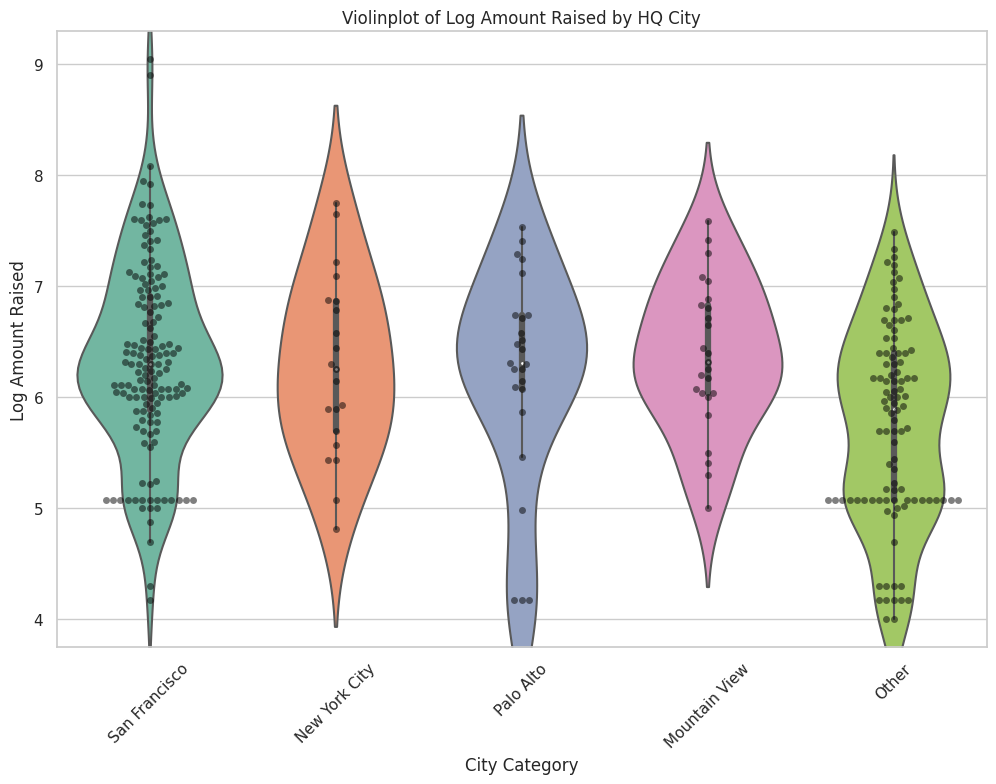

In [84]:
# Find the four most common HQ City values
top_cities = startups_with_amount_raised['HQ City'].value_counts().index[:4]

# Create a new column "City Category" with the top cities and "Other" for the rest
startups_with_amount_raised['City Category'] = startups_with_amount_raised['HQ City'].apply(lambda x: x if x in top_cities else 'Other')

# Create a violinplot for the "log amount raised" column with City Category
plt.figure(figsize=(12, 8))
sns.violinplot(x='City Category', y='log amount raised', data=startups_with_amount_raised, palette='Set2')
sns.swarmplot(x='City Category', y='log amount raised', data=startups_with_amount_raised, color='black', alpha=0.5)

# Add labels
plt.xlabel('City Category')
plt.ylabel('Log Amount Raised')

# Show the plot
plt.title('Violinplot of Log Amount Raised by HQ City')
plt.xticks(rotation=45)
plt.show()

We can see that the distribution of the amount raised by location is mostly similar across USA cities excluding San Francisco

The biggest difference is that non-USA based companies raise significantly lower amounts of money than USA basec companies

The other significant finding is that nearly all of the companies raising a lot of money are located in San Francisco

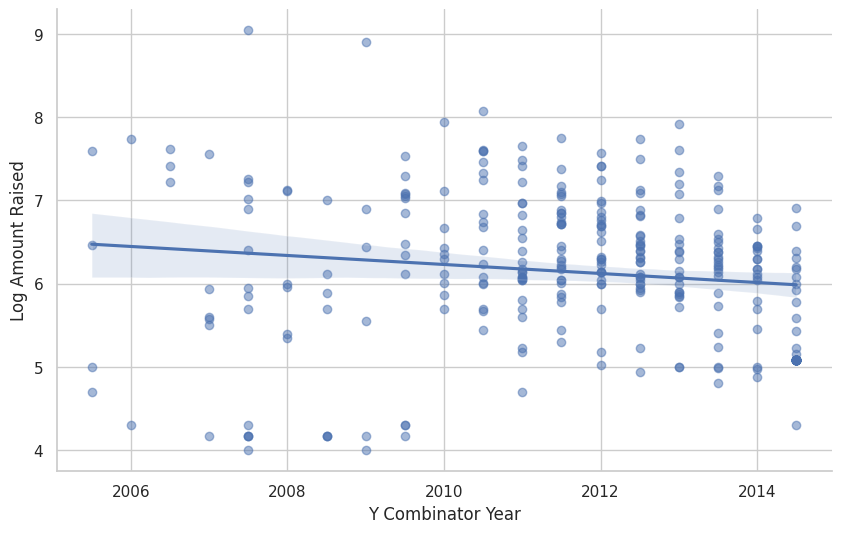

In [85]:
# # Create a scatterplot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Y Combinator Year', y='log amount raised', data=startups_with_amount_raised)

# # Add labels
# plt.xlabel('Y Combinator Year')
# plt.ylabel('Log Amount Raised')

# # Show the plot
# plt.title('Scatterplot of Y Combinator Year vs. Log Amount Raised')
# plt.show()

# Create a scatterplot with linear regression line and error bounds
plt.figure(figsize=(10, 6))
sns.regplot(x='Y Combinator Year', y='log amount raised', data=startups_with_amount_raised, scatter_kws={'alpha':0.5})
sns.despine()

# Add labels
plt.xlabel('Y Combinator Year')
plt.ylabel('Log Amount Raised')

# Show the plot
plt.show()

We can see that there's no clear correlation between the average amount raised and the time when it was raised

We even have slightly negative correlation, which could possibly be explained by the fact that there were quite a few companies receiving large amounts of money before the 2008 financial crisis, and that there were fewer such comanies after that

We can now start looking at the amount raised by category

In [86]:
startups_with_amount_raised['Categories'] = startups_with_amount_raised['Categories'].astype(str).apply(lambda x: x.split(','))
categories=[]
for cats in startups_with_amount_raised['Categories']:
    cats_cleaned=[x.replace("[","").replace("]","").strip() for x in cats]
    categories.extend(cats_cleaned)
print(len(categories))
cat = pd.DataFrame({
    'category' : categories
},dtype='object')

cat = cat[cat['category']!='nan']
cat.head()

780


/tmp/ipykernel_272009/2083982410.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category
0,E-Commerce
1,Analytics
2,Internet
3,Marketing
4,Social Media


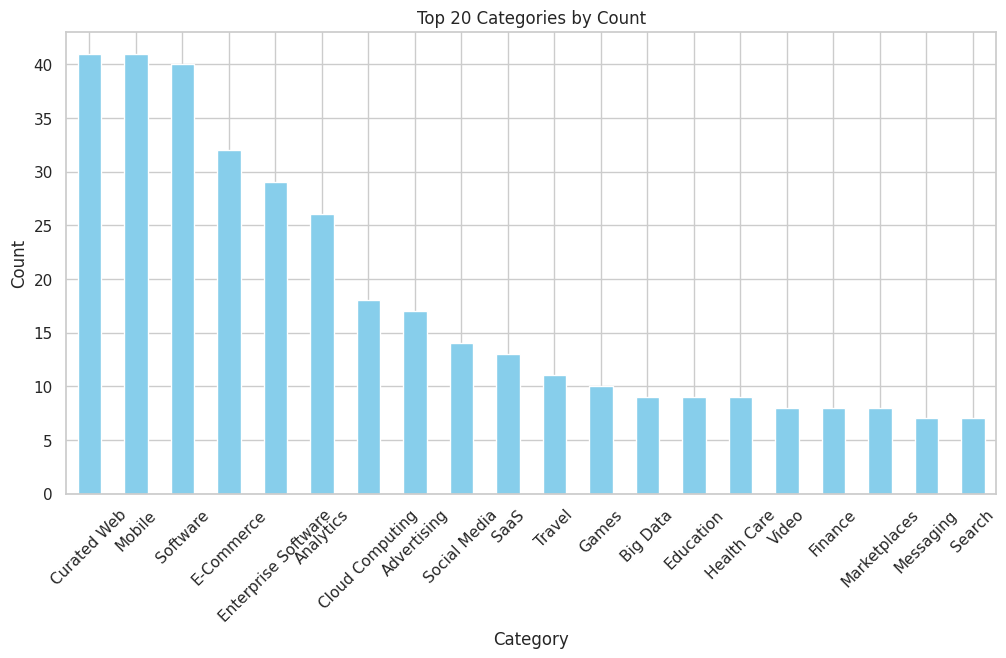

In [87]:
# Get the top 10 categories by count
top_categories = cat['category'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 20 Categories by Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

As expected, most of companies are heavily technology related, with some other categories also appearing occassianally

In [88]:
unique_categories=cat['category'].unique()
print(len(unique_categories))
print(unique_categories[:5])

230
['E-Commerce' 'Analytics' 'Internet' 'Marketing' 'Social Media']


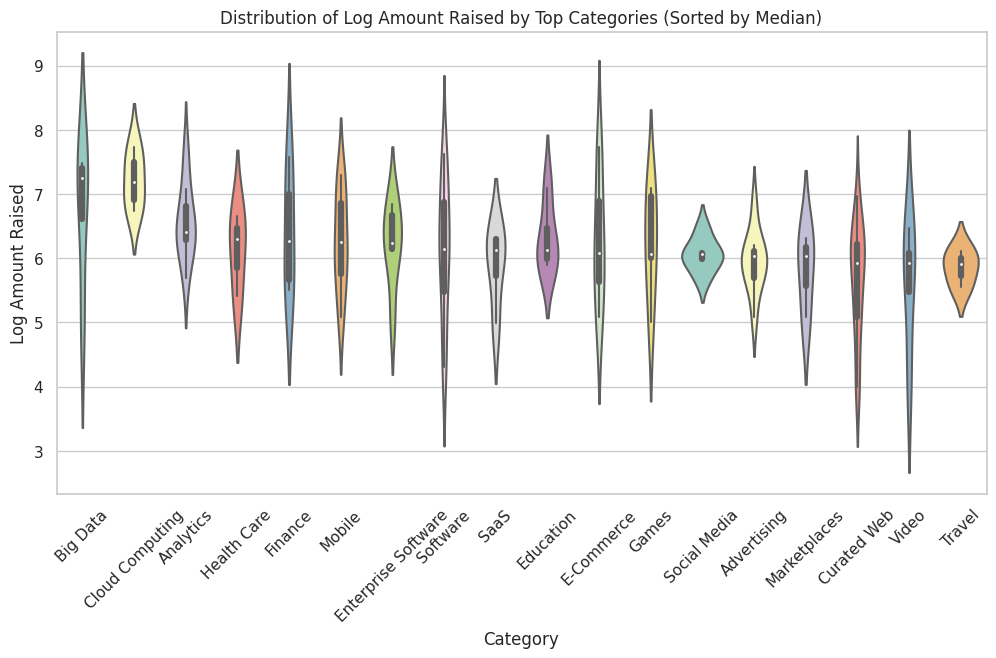

In [89]:
# Get the top 15 categories by count
top_categories = startups_with_amount_raised['Categories'].explode().str.strip().value_counts().head(18).index

# Create an empty list to store data for each category
category_data = []

# Create a dictionary to store the median log amount raised for each category
category_medians = {}

# Loop through the top 15 categories
for category in top_categories:
    # Filter the DataFrame for the current category
    category_df = startups_with_amount_raised[startups_with_amount_raised['Categories'].apply(lambda cats: category in cats)]
    
    # Append the "log amount raised" column to the list
    category_data.append(category_df['log amount raised'].values)
    
    # Calculate and store the median log amount raised for the current category
    median_log_amount_raised = category_df['log amount raised'].median()
    category_medians[category] = median_log_amount_raised

# Sort the top_categories based on median log amount raised
sorted_categories = sorted(top_categories, key=lambda x: category_medians[x], reverse=True)

# Create a DataFrame from the category_data list
category_df = pd.DataFrame(category_data).T
category_df.columns = top_categories

# Create a combined box plot and swarm plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=category_df, palette='Set3', order=sorted_categories)
# sns.swarmplot(data=category_df, palette='Set2', size=3, alpha=0.7, order=sorted_categories)

plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Log Amount Raised')
plt.title('Distribution of Log Amount Raised by Top Categories (Sorted by Median)')
plt.show()

We can see that most of the top categories raise similar amounts to the global average

The only significant outliers are big data and cloud computing which raise significantly more on average, which could be explained by the high initial costs in these categories compared to other ones

We can see that there are some categories such as "software" and "games with significant intra category variance, while others such as "travel" and "social media" have significantly lower variance, although this could be partly due to a small sample size

We can now analyze company status and factors that affect it

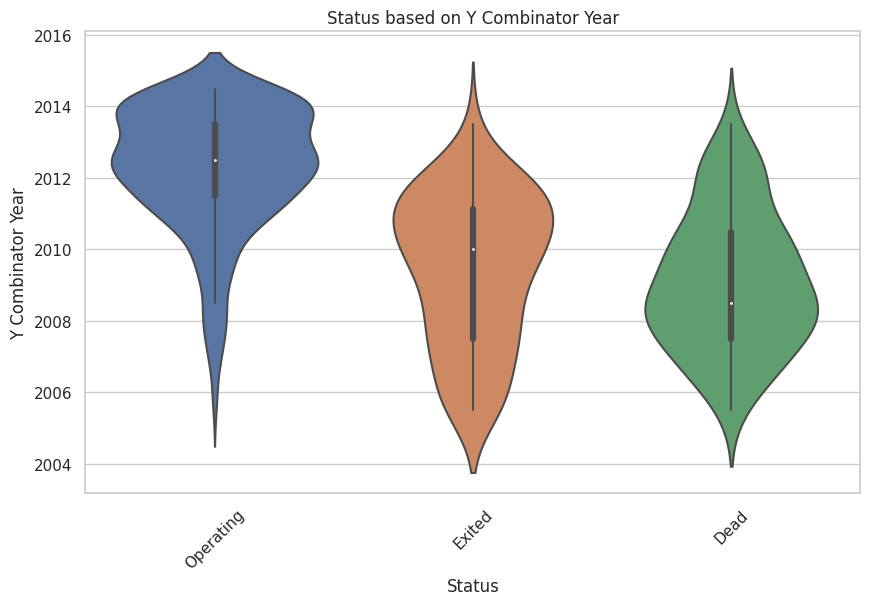

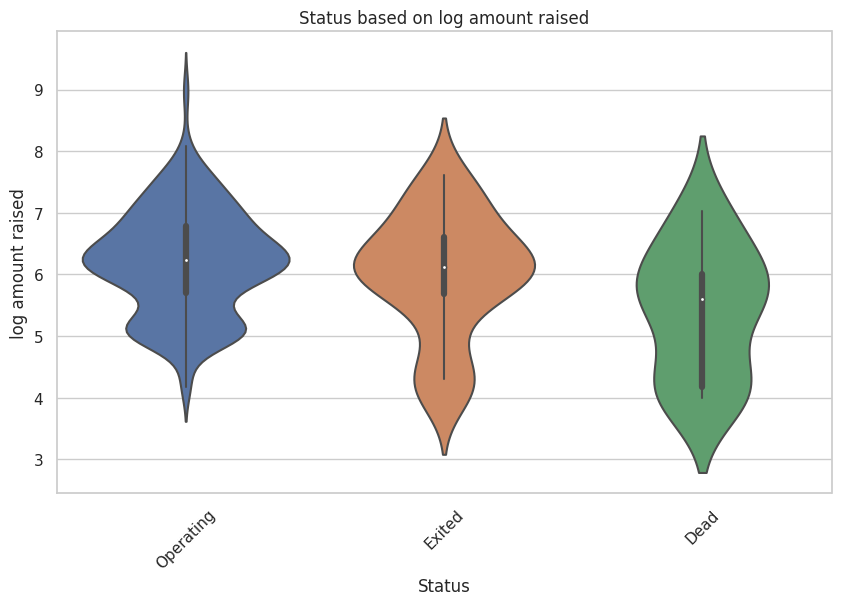

In [90]:
numerical_variables=["Y Combinator Year", "log amount raised"]

for var in numerical_variables:
    plt.figure(figsize=(10, 6))
    # Filter out rows with NaN or infinite values in the specified numerical variable
    valid_data = startups_df[~startups_df[var].isna() & ~startups_df[var].isin([np.inf, -np.inf])]
    sns.violinplot(x='Status', y=var, data=valid_data)
    plt.xticks(rotation=45)
    plt.title(f'Status based on {var}')
    plt.show()

We can see that more recent companies are operating significantly more often than older companies, but this is probably due to the fact that the newer companies generally don't have enough time to go bankrupt and newer data about them would probably even this out somewhat

Also, we can see that operating companies raise sigfificantly more than dead companies, which might be one of the general reasons those companies are dead in the first place

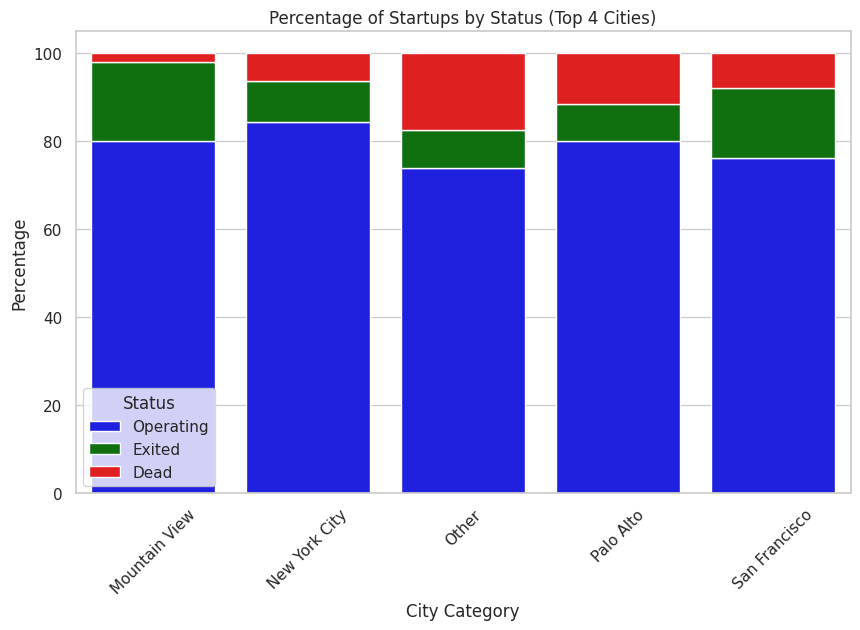

In [91]:
# Determine the top 4 cities
top_cities = startups_df['HQ City'].value_counts().head(4).index

# Create a new column 'City Category' to categorize cities
startups_df['City Category'] = startups_df['HQ City'].apply(lambda x: x if x in top_cities else 'Other')

# Calculate the total number of startups in each category
city_category_counts = startups_df['City Category'].value_counts()

# Sort the "City Category" based on the number of startups in the top 4 cities (decreasing order)
city_category_counts = city_category_counts[top_cities.tolist() + ['Other']]

# Calculate the percentage of each status within each city category
city_category_status_counts = startups_df.groupby(['City Category', 'Status']).size().unstack(fill_value=0)
city_category_status_percentages = city_category_status_counts.divide(city_category_counts, axis=0) * 100

# Bar plot for "City Category" vs. "Status" with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='City Category', y='Operating', data=city_category_status_percentages.reset_index(), label='Operating', color='blue')
sns.barplot(x='City Category', y='Exited', data=city_category_status_percentages.reset_index(), bottom=city_category_status_percentages['Operating'], label='Exited', color='green')
sns.barplot(x='City Category', y='Dead', data=city_category_status_percentages.reset_index(), 
            bottom=city_category_status_percentages['Operating'] + city_category_status_percentages['Exited'], 
            label='Dead', color='red')

plt.xticks(rotation=45)
plt.title('Percentage of Startups by Status (Top 4 Cities)')
plt.xlabel('City Category')
plt.ylabel('Percentage')
plt.legend(title='Status')
plt.show()

We see that California-based startup exit more frequently than other ones, while startups based in less frequent cities are dead significantly more than ones in the major cities

We can now try looking at company descriptions and attempt to cluster them based on that, and draw new conclusions from the clusters

We will use the t-sne projection to 2 dimensions of the bert embedding for the description of the company and plot that against other relevant data

In [92]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import plotly.express as px
import plotly.offline as pyo

# Load a pre-trained Sentence Transformer model for sentence embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to get Sentence Transformer embeddings for the "Description" column
def get_sentence_transformer_embedding(description):
    if pd.notnull(description):
        return model.encode(description, convert_to_tensor=True)
    else:
        return np.zeros(model.get_sentence_embedding_dimension())

# Apply the get_sentence_transformer_embedding function to create a new column "SentenceTransformer_Description"
startups_df['SentenceTransformer_Description'] = startups_df['Description'].apply(get_sentence_transformer_embedding)

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(np.vstack(startups_df['SentenceTransformer_Description']))

# Add the t-SNE results to the DataFrame
startups_df['TSNE_1'] = tsne_result[:, 0]
startups_df['TSNE_2'] = tsne_result[:, 1]




/home/mihailo/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mihailo/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [93]:
import plotly.express as px

# Filter out rows with null descriptions
startups_df_filtered = startups_df.dropna(subset=['Description'])

# Create a scatter plot with hue based on "Status"
fig1 = px.scatter(startups_df_filtered, x='TSNE_1', y='TSNE_2', color='Status', hover_name='Description')

fig1.update_layout(
    title="Description embedding by operating status",
    xaxis_title="embedding Dimension 1",
    yaxis_title="embedding Dimension 2"
)

startups_df_filtered2=startups_df_filtered[startups_df_filtered["Amount raised (USD)"]>0.1]

# Create a scatter plot with hue based on "log_amount_raised"
fig2 = px.scatter(startups_df_filtered2, x='TSNE_1', y='TSNE_2', color='log amount raised', hover_name='Description')

fig2.update_layout(
    title="Description embedding by log_amount_raised",
    xaxis_title="embedding Dimension 1",
    yaxis_title="embedding Dimension 2"
)

# Show both plots
fig1.show()
fig2.show()




We can see that companies with descriptions that stand out appear to tend to do better (lower exit/dead rate and nearly no companies of that kind have low funding)

We can also see that a lot of our descriptions are clustered together quite a lot, and the main cluster appears to be "generic technology company description"

We can also do some analysis of startups based on the founder. The only information given here besides the founders name and company is their gender, so we take a look at that

In [94]:
startupmerge = pd.merge(founders_df, startups_df, on='Company')
startupmerge.drop('Founders', axis=1)
startupmerge.dropna(subset=['Status','Gender'])

startupmerge.head()

,Founder,Company,Gender,Status,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,...,Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website,Amount raised (USD),log amount raised,City Category,SentenceTransformer_Description,TSNE_1,TSNE_2
0,Aakash Patel,Flytenow,Male,Operating,2013,Boston - Massachusetts - USA,Go flying with local pilots,"Collaboration, Consumption, Adventure, Travel,...","Aakash Patel, Alan Guichard, Andrew Mass, Matt...",2014.5,...,http://a4.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/flytenow,http://www.flytenow.com,145000,5.161368,Other,"[tensor(1.0162), tensor(0.3170), tensor(-0.064...",9.449553,8.292274
1,Alan Guichard,Flytenow,Male,Operating,2013,Boston - Massachusetts - USA,Go flying with local pilots,"Collaboration, Consumption, Adventure, Travel,...","Aakash Patel, Alan Guichard, Andrew Mass, Matt...",2014.5,...,http://a4.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/flytenow,http://www.flytenow.com,145000,5.161368,Other,"[tensor(1.0162), tensor(0.3170), tensor(-0.064...",9.449553,8.292274
2,Andrew Mass,Flytenow,Male,Operating,2013,Boston - Massachusetts - USA,Go flying with local pilots,"Collaboration, Consumption, Adventure, Travel,...","Aakash Patel, Alan Guichard, Andrew Mass, Matt...",2014.5,...,http://a4.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/flytenow,http://www.flytenow.com,145000,5.161368,Other,"[tensor(1.0162), tensor(0.3170), tensor(-0.064...",9.449553,8.292274
3,Matt Voska,Flytenow,Male,Operating,2013,Boston - Massachusetts - USA,Go flying with local pilots,"Collaboration, Consumption, Adventure, Travel,...","Aakash Patel, Alan Guichard, Andrew Mass, Matt...",2014.5,...,http://a4.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/flytenow,http://www.flytenow.com,145000,5.161368,Other,"[tensor(1.0162), tensor(0.3170), tensor(-0.064...",9.449553,8.292274
4,Aarjav Trivedi,InstantCab,Male,Operating,<NA>,San Francisco - California - USA,InstantCab is a mobile app that matches custom...,Mobile,Aarjav Trivedi,2012.0,...,http://a4.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/summon,http://instantcab.com,0,-inf,San Francisco,"[tensor(-0.1460), tensor(-0.3315), tensor(-0.5...",5.837377,7.741165


/home/mihailo/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



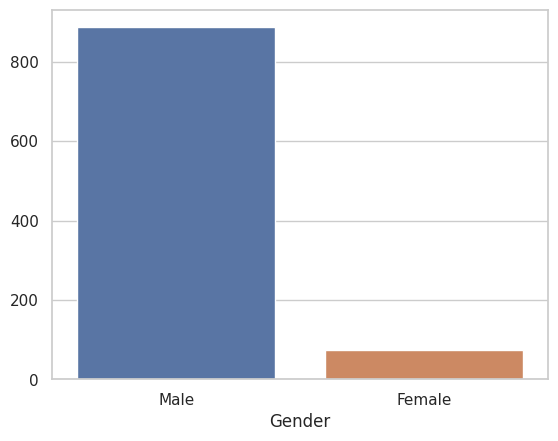

In [103]:
gender_sum = startupmerge['Gender'].value_counts()
sns.barplot(x=gender_sum.index, y=gender_sum.values)
startupmerge["log amount raised"]=np.log10(startupmerge['Amount raised (USD)'])

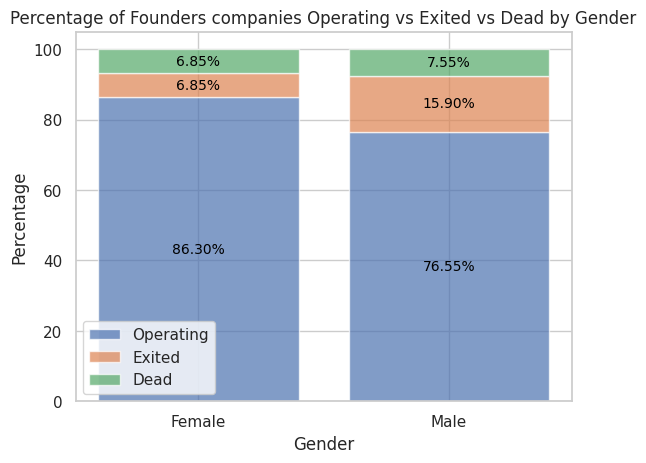

In [104]:
# Create df for male and female founders
filtered_founders = startupmerge[startupmerge['Status'].isin(['Operating', 'Exited', 'Dead'])]
female_founders = filtered_founders[filtered_founders['Gender'] == 'Female']
male_founders = filtered_founders[filtered_founders['Gender'] == 'Male']

# Create percentages for females founders that are operating, exited, and dead
female_operating_percentage = (female_founders['Status'] == 'Operating').mean() * 100
female_exited_percentage = (female_founders['Status'] == 'Exited').mean() * 100
female_dead_percentage = (female_founders['Status'] == 'Dead').mean() * 100

# Create percentages for males founders that are operating, exited, and dead
male_operating_percentage = (male_founders['Status'] == 'Operating').mean() * 100
male_exited_percentage = (male_founders['Status'] == 'Exited').mean() * 100
male_dead_percentage = (male_founders['Status'] == 'Dead').mean() * 100

# Create bar chart
gender_labels = ['Female', 'Male']
x = range(len(gender_labels))

plt.bar(x, [female_operating_percentage, male_operating_percentage], label='Operating', alpha=0.7)
plt.bar(x, [female_exited_percentage, male_exited_percentage], bottom=[female_operating_percentage, male_operating_percentage], label='Exited', alpha=0.7)
plt.bar(x, [female_dead_percentage, male_dead_percentage], bottom=[female_operating_percentage + female_exited_percentage, male_operating_percentage + male_exited_percentage], label='Dead', alpha=0.7)

plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Founders companies Operating vs Exited vs Dead by Gender')
plt.xticks(x, gender_labels)
plt.legend()

for i, (op_percentage, ex_percentage, dead_percentage) in enumerate(zip([female_operating_percentage, male_operating_percentage], [female_exited_percentage, male_exited_percentage], [female_dead_percentage, male_dead_percentage])):
    plt.text(i, op_percentage / 2, f'{op_percentage:.2f}%', ha='center', va='center', fontsize=10, color='black')
    plt.text(i, op_percentage + ex_percentage / 2, f'{ex_percentage:.2f}%', ha='center', va='center', fontsize=10, color='black')
    plt.text(i, op_percentage + ex_percentage + dead_percentage / 2, f'{dead_percentage:.2f}%', ha='center', va='center', fontsize=10, color='black')

plt.show()

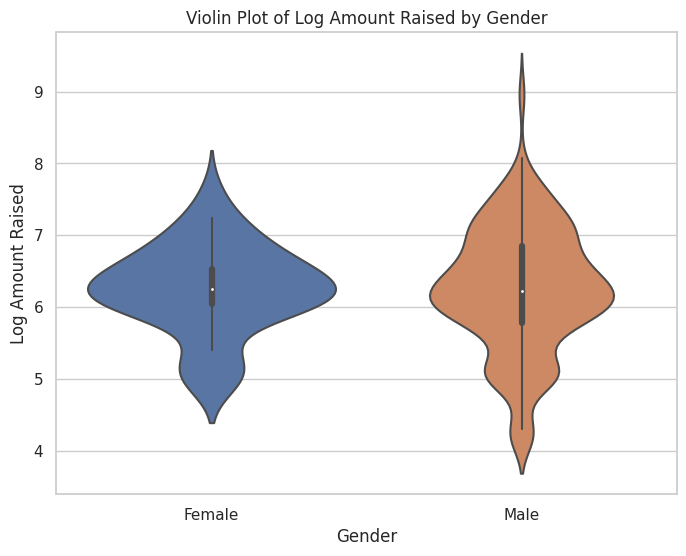

In [107]:
# Filter the data for male and female founders, removing NaN and Inf values
filtered_data = startupmerge[~startupmerge['log amount raised'].isnull()]
filtered_data = filtered_data[~np.isinf(filtered_data['log amount raised'])]

female_founders = filtered_data[filtered_data['Gender'] == 'Female']
male_founders = filtered_data[filtered_data['Gender'] == 'Male']

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='log amount raised', data=filtered_data, order=['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Log Amount Raised')
plt.title('Violin Plot of Log Amount Raised by Gender')
plt.show()

First of all, there are only a small number of female compared to male founders

We can see that female founders exit significantly less frequently than men, while their companies die about the same fraction of the time

Also, we can see that there is a much larger variance in the amount raised for men compared to women, probably because there is a significantly larger sample size there.